# State tomography

### Classical tomography 
The simplest classical analogy to estimating a quantum state using tomography is estimating the bias of a coin. The bias, denoted bias by $p$, is analogous to the quantum state in a way that will be explained shortly.

If we have access to $n_{\rm Tot}$ independent experiements (or measurements) and observe $n_{\rm H}$ heads then maximum likelihood estimate for the bias of the coin is

$$ p_{\rm Max-Like} = \frac{n_H}{n_{\rm Tot}},$$

and the variance of this estimator is $ {\rm Var}[p_{\rm Max-Like}] = p(1-p)/n_{\rm Tot}$.

The things to learn from this example are:
* it takes many measurements to estiamte $p$, it can't be done in a single shot
* $p_{\rm Max-Like}$ is an estimator, there are other choices of estimators see e.g. [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference) and [Bayes estimator](https://en.wikipedia.org/wiki/Bayes_estimator)


Let's take the analogy a little further. Lets define a "quantum" state 

$$\begin{align}
\rho 
&= \begin{pmatrix} p & 0\\ 0 & 1-p\end{pmatrix} \\
&= \frac{1}{2} (I +z Z)\\
&=\frac{1}{2} \begin{pmatrix} 1+z & 0\\ 0 & 1-z\end{pmatrix},
\end{align}
$$ 
where $I$ and $Z$ are the identity and the Pauli-z matrix. This parameterizes the states along the z-axis of the Bloch sphere


<img src="figs/bloch.png" alt="Drawing" style="width: 350px;"/>



The relationship between the $Z$ expectation value and the coin bias is

$$z:= \langle Z \rangle = {\rm Tr}[Z \rho] = 2 p -1.$$

In this analogy the pure states $|0\rangle$ and $|1\rangle$ corespond to the coin biases $p=1$, $p=0$ and z expectation values $z=+1$, $z=-1$ respectively. All other (mixed) states are convex mixtures of these extremal points e.g. the fair coin, i.e. $p=1/2$, corresponds to $z = 0$ and the state  
$$
\rho 
= \begin{pmatrix} 0.5 & 0\\ 0 & 0.5\end{pmatrix}. 
$$

### Quantum tomography of a single qubit

The simplest quantum system to tomograph is a single qubit. Like before we parameterize the state with respect to a set of operators 
$$\begin{align}
\rho 
&= \frac{1}{2} (I+x X+ y Y +z Z)\\
&=\frac{1}{2} \begin{pmatrix} 1+z & x+iy\\ x-iy & 1-z\end{pmatrix},
\end{align}
$$ 
where $x = \langle X \rangle$, $y = \langle Y \rangle$, and $z = \langle Z \rangle$. In the language of our classical coin we have three parameters we need to estimate that are constrained in the following way

$$
0\le x \le 1\\
0\le y \le 1\\ 
0\le z \le 1\\
x^2 + y^2 +z^2 \le 1.
$$

The physics of our system means that our default our measurement gives us the Z basis statistics. We already constructed an estimator to go from the coin flip statistics to the Z expectation: $2p -1$. 


Now we need to, measure the statistics of the operators X and Y. Essentially this means we must rotate our state after we prepare it but before it is measured (or equivalently rotate our measurement basis). If we rotate the state as $\rho\mapsto U\rho U^\dagger$ and then do our usual Z-basis measurement, then this is equivalent to rotating the measured observable as $Z \mapsto U^\dagger Z U$ and keeping our state $\rho$ unchanged. This is the disticntion between the [Heisenberg and Schrödinger pictures](https://en.wikipedia.org/wiki/Heisenberg_picture#Summary_comparison_of_evolution_in_all_pictures). The Heisenberg picture point of view then allows us to see that if we apply a rotation such as $R_y(\alpha) = \exp(-i \alpha Y /2)$ for $\alpha = -\pi/2$ then this rotates the observable as $R_y(\pi/2)ZR_y(-\pi/2)=\cos(\pi/2) Z + \sin(\pi/2) X = X$. Similarly, we could rotate by $U=R_x(\pi/2)$ to measure the Y observable.  


### Quantum state tomography in general   
In this section we closely follow the reference [PBT]. 

When thinking about tomography it is useful to introduce the notation of "super kets" $|O\rangle \rangle = {\rm vec}(O)$  for an operator $O$.
The dual vector is the corresponding "super bra" $\langle\langle O|$ and represents $O^\dagger$. This vector space has is equiped with the Hilbert-Schmidt inner product  $\langle\langle A | B \rangle\rangle = {\rm Tr}[A^\dagger B]$. For more information see [vec and unvec in superoperator_representations.md](../.././forest-benchmarking/docs/superoperator_representations.md) and the [superoperator_tools ipython notebook](superoperator_tools.ipynb).

A quantum state matrix on $n$ qubits, a  $D =2^n$ dimensional Hilbert
space, can be represented by 
$$
    \rho =  \frac{1}{D} I + \sum_{\alpha=1}^{D^2-1}x_\alpha B_\alpha
$$
where the coefficents $x_\alpha$ are defined by $x_\alpha = \langle\langle B_\alpha | \rho \rangle\rangle$ for a basis of Hermitian operators
$\{ B_\alpha \}$ that is orthonormal under the Hilbert-Schmidt inner product
$\langle\langle B_\alpha | B_\beta\rangle\rangle =\delta_{\alpha,\beta}$.

For many qubits, tensor products of Pauli matrices 
matrices are the natural Hermitian basis. For two qubits define $B_5 = X \otimes X$ and $B_6 = X \otimes Y$ then $\langle\langle B_5 | B_6\rangle\rangle =0$. It is typical to choose $B_0 = I / \sqrt {D}$ to be the only traceful element.

State tomography involves estimating or measuring the expectation values of all the operators $\{ B_\alpha \}$. If you can reconstruct all the operators $\{ B_\alpha \}$ then your measurement is said to be **tomographically complete**. The operators that need to be estimatated are programatically given by `itertools.product(['I', 'X', 'Y', 'Z'], repeat=n_qubits)`. From these measurements, we can reconstruct a density matrix $\rho$ on `n_qubits`.


Most research in quantum state tomography is to do with finding estimators with desirable properties, e.g. [Minimax tomography](https://arxiv.org/abs/1503.03100), although experiment design is also considered e.g. [adaptive quantum state tomography](https://arxiv.org/abs/1303.0436).  


**More information**  
See the following references:

[QTW] [Quantum tomography wikipedia page](https://en.wikipedia.org/wiki/Quantum_tomography)

[CWPHD] *Initialization and characterization of open quantum systems*  
Christopher Wood,  
Chapter 3, PhD Thesis, University of Waterloo (2015)  
http://hdl.handle.net/10012/9557  


[IGST]  *Introduction to Quantum Gate Set Tomography*  
Daniel Greenbaum,  
arXiv:1509.02921 (2015)    
https://arxiv.org/abs/1509.02921  


[PBT]  *Practical Bayesian Tomography*  
Christopher Granade et al.  
New J. Phys. 18, 033024 (2016)  
https://dx.doi.org/10.1088/1367-2630/18/3/033024  
https://arxiv.org/abs/1509.03770

## Quantum state tomography in `forest.benchmarking`

The basic workflow is:

1. prepare a state by specifying a pyQuil program
2. construct a list of observables that are needed to estimate the state; we collect this into an object called an `ObservablesExperiment`.
3. Aquire the data by running the program on a QVM or QPU.
4. Apply an estimator to the data to obtain an estimate of the state
5. Compare the estimated state to the true state by a distance measure or visualization


Below we break these steps down in to all their gastly glory, before providing a packaged function.

## Step 1. Prepare a state with a `Program`
We'll construct a two-qubit graph state by Hadamarding all qubits and then applying a controlled-Z operation across edges of our graph. In the two-qubit case, there's only one edge. The vector we end up preparing is

$$ |\Psi\rangle = \frac{1}{2}\begin{pmatrix} 1\\ 1 \\ 1\\ -1\end{pmatrix}= {\rm CZ}(0,1){\rm H}(1){\rm H}(0)|0,0\rangle,$$

which corresponds to the state matrix

$$ \rho_{\rm true} = |\Psi\rangle\langle \Psi| = \frac{1}{4}\begin{pmatrix} 1 & 1 & 1 &-1\\ 1 & 1 & 1 &-1 \\ 1 & 1 & 1 &-1\\ -1 & -1 & -1 & 1\end{pmatrix}.$$

In [1]:
import numpy as np
from pyquil import Program
from pyquil.gates import *

In [2]:
# numerical representation of the true state
Psi = (1/2) * np.array([1, 1, 1, -1])
rho_true = np.outer(Psi, Psi.T.conj())

rho_true

array([[ 0.25,  0.25,  0.25, -0.25],
       [ 0.25,  0.25,  0.25, -0.25],
       [ 0.25,  0.25,  0.25, -0.25],
       [-0.25, -0.25, -0.25,  0.25]])

In [3]:
# construct the state preparation program

qubits = [0, 1]
state_prep_prog = Program()

for qubit in qubits:
    state_prep_prog += H(qubit)
    
state_prep_prog += CZ(qubits[0], qubits[1])

print(state_prep_prog)

H 0
H 1
CZ 0 1



## Step 2. Construct a `ObservablesExperiment` for state tomography

We use the helper function `generate_state_tomography_experiment` to construct a tomographically complete set of measurements.

We can print this out to see the 16 observables or operator measurements we will perform.

In [4]:
# import the generate_state_tomography_experiment function 
from forest.benchmarking.tomography import generate_state_tomography_experiment

experiment = generate_state_tomography_experiment(program=state_prep_prog, qubits=qubits)

print(experiment)

H 0; H 1; CZ 0 1
0: Z0_0 * Z0_1→(1+0j)*X1
1: Z0_0 * Z0_1→(1+0j)*Y1
2: Z0_0 * Z0_1→(1+0j)*Z1
3: Z0_0 * Z0_1→(1+0j)*X0
4: Z0_0 * Z0_1→(1+0j)*X0X1
5: Z0_0 * Z0_1→(1+0j)*X0Y1
6: Z0_0 * Z0_1→(1+0j)*X0Z1
7: Z0_0 * Z0_1→(1+0j)*Y0
8: Z0_0 * Z0_1→(1+0j)*Y0X1
9: Z0_0 * Z0_1→(1+0j)*Y0Y1
10: Z0_0 * Z0_1→(1+0j)*Y0Z1
11: Z0_0 * Z0_1→(1+0j)*Z0
12: Z0_0 * Z0_1→(1+0j)*Z0X1
13: Z0_0 * Z0_1→(1+0j)*Z0Y1
14: Z0_0 * Z0_1→(1+0j)*Z0Z1


In [5]:
# lets peek into the object
print('The object "experiment" is a:')
print(type(experiment),'\n')
print('It has a program attribute:')
print(experiment.program)
print('It also has a list of observables that need to be estimated:')
print(experiment.settings_string())

The object "experiment" is a:
<class 'forest.benchmarking.observable_estimation.ObservablesExperiment'> 

It has a program attribute:
H 0
H 1
CZ 0 1

It also has a list of observables that need to be estimated:
0: Z0_0 * Z0_1→(1+0j)*X1
1: Z0_0 * Z0_1→(1+0j)*Y1
2: Z0_0 * Z0_1→(1+0j)*Z1
3: Z0_0 * Z0_1→(1+0j)*X0
4: Z0_0 * Z0_1→(1+0j)*X0X1
5: Z0_0 * Z0_1→(1+0j)*X0Y1
6: Z0_0 * Z0_1→(1+0j)*X0Z1
7: Z0_0 * Z0_1→(1+0j)*Y0
8: Z0_0 * Z0_1→(1+0j)*Y0X1
9: Z0_0 * Z0_1→(1+0j)*Y0Y1
10: Z0_0 * Z0_1→(1+0j)*Y0Z1
11: Z0_0 * Z0_1→(1+0j)*Z0
12: Z0_0 * Z0_1→(1+0j)*Z0X1
13: Z0_0 * Z0_1→(1+0j)*Z0Y1
14: Z0_0 * Z0_1→(1+0j)*Z0Z1


### Optional grouping
We can simultaneously estimate some of these observables, this saves on run time.

In [6]:
from forest.benchmarking.observable_estimation import group_settings
print(group_settings(experiment))

H 0; H 1; CZ 0 1
0: Z0_0 * Z0_1→(1+0j)*X1, Z0_0 * Z0_1→(1+0j)*X0, Z0_0 * Z0_1→(1+0j)*X0X1
1: Z0_0 * Z0_1→(1+0j)*Y1, Z0_0 * Z0_1→(1+0j)*X0Y1
2: Z0_0 * Z0_1→(1+0j)*Z1, Z0_0 * Z0_1→(1+0j)*X0Z1
3: Z0_0 * Z0_1→(1+0j)*Y0, Z0_0 * Z0_1→(1+0j)*Y0X1
4: Z0_0 * Z0_1→(1+0j)*Y0Y1
5: Z0_0 * Z0_1→(1+0j)*Y0Z1
6: Z0_0 * Z0_1→(1+0j)*Z0, Z0_0 * Z0_1→(1+0j)*Z0X1
7: Z0_0 * Z0_1→(1+0j)*Z0Y1
8: Z0_0 * Z0_1→(1+0j)*Z0Z1


## Step 3. Aquire the data

PyQuil will run the tomography programs.

We will use the QVM but at this point you can use a QPU.

In [7]:
from pyquil import get_qc
qc = get_qc('2q-qvm')

The next step is to over-write full `quilc` compilation with a much more simple version that *only* substitutes gates to Rigetti-native gates.

We do this because, we don't want to accidentally compile away our tomography circuit or map to different qubits.

In [8]:
from forest.benchmarking.compilation import basic_compile
qc.compiler.quil_to_native_quil = basic_compile

Now get the data!

In [9]:
from forest.benchmarking.observable_estimation import estimate_observables

results = list(estimate_observables(qc, experiment))

print('ExperimentResult[(input operators)→(output operator): "mean" +- "standard error"]')
results

ExperimentResult[(input operators)→(output operator): "mean" +- "standard error"]


[ExperimentResult[Z0_0 * Z0_1→(1+0j)*X1: -0.008 +- 0.04471992844359213],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Y1: 0.016 +- 0.04471563484956912],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Z1: -0.02 +- 0.04471241438347967],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*X0: 0.056 +- 0.044651181395344956],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*X0X1: -0.036 +- 0.044692370713579295],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*X0Y1: 0.028 +- 0.04470382533967311],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*X0Z1: 1.0 +- 0.0],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Y0: -0.044 +- 0.0446780483011512],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Y0X1: 0.004 +- 0.04472100177768829],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Y0Y1: 1.0 +- 0.0],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Y0Z1: 0.036 +- 0.044692370713579295],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Z0: 0.064 +- 0.044629676225578875],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Z0X1: 1.0 +- 0.0],
 ExperimentResult[Z0_0 * Z0_1→(1+0j)*Z0Y1: 0.004 +- 0.04472100177768829],
 ExperimentResult[Z0_0 *

## Step 4. Apply some estimators to the data "do tomography"

### Linear inversion estimator

In [10]:
from forest.benchmarking.tomography import linear_inv_state_estimate

rho_est_linv = linear_inv_state_estimate(results, qubits=qubits)

print(np.round(rho_est_linv, 3))

[[ 0.254-0.j     0.248-0.005j  0.264+0.002j -0.259-0.008j]
 [ 0.248+0.005j  0.278+0.j     0.241+0.006j -0.236+0.02j ]
 [ 0.264-0.002j  0.241-0.006j  0.236-0.j    -0.252-0.003j]
 [-0.259+0.008j -0.236-0.02j  -0.252+0.003j  0.232-0.j   ]]


### Linear inversion projected to closest physical state

In [11]:
from forest.benchmarking.operator_tools.project_state_matrix import project_state_matrix_to_physical

rho_phys = project_state_matrix_to_physical(rho_est_linv)

print(np.round(rho_phys, 3))

[[ 0.259+0.j     0.246+0.001j  0.251+0.003j -0.246-0.002j]
 [ 0.246-0.001j  0.26 +0.j     0.239+0.001j -0.235+0.009j]
 [ 0.251-0.003j  0.239-0.001j  0.243+0.j    -0.239+0.001j]
 [-0.246+0.002j -0.235-0.009j -0.239-0.001j  0.238-0.j   ]]


### Maximum Liklihood Estimate (MLE) via diluted iterative method

In [12]:
from forest.benchmarking.tomography import iterative_mle_state_estimate

rho_mle = iterative_mle_state_estimate(results=results, qubits=qubits)

print(np.around(rho_mle, 3))

[[ 0.258-0.j     0.255+0.002j  0.253+0.002j -0.251+0.001j]
 [ 0.255-0.002j  0.251-0.j     0.249-0.001j -0.247+0.003j]
 [ 0.253-0.002j  0.249+0.001j  0.248+0.j    -0.245+0.002j]
 [-0.251-0.001j -0.247-0.003j -0.245-0.002j  0.243+0.j   ]]


### MLE with Max Entropy constraint

In [13]:
rho_mle_maxent = iterative_mle_state_estimate(results=results, qubits=qubits, epsilon=0.05, entropy_penalty=0.05)

print(np.around(rho_mle_maxent, 3))

[[ 0.256+0.j     0.206+0.j     0.209+0.001j -0.206-0.001j]
 [ 0.206-0.j     0.256+0.j     0.202+0.001j -0.199+0.006j]
 [ 0.209-0.001j  0.202-0.001j  0.246-0.j    -0.202+0.001j]
 [-0.206+0.001j -0.199-0.006j -0.202-0.001j  0.242+0.j   ]]


### MLE with Hedging parameter

In [14]:
rho_mle_hedge = iterative_mle_state_estimate(results=results, qubits=qubits, epsilon=.001, beta=.61)

print(np.around(rho_mle_hedge, 3))

[[ 0.258+0.j     0.254+0.002j  0.252+0.002j -0.25 +0.001j]
 [ 0.254-0.002j  0.251-0.j     0.249-0.001j -0.246+0.003j]
 [ 0.252-0.002j  0.249+0.001j  0.248-0.j    -0.245+0.002j]
 [-0.25 -0.001j -0.246-0.003j -0.245-0.002j  0.243+0.j   ]]


## Step 5. Compare estimated state to the true state

### Or visualize using Hinton plots

Compare purities of estimates

In [15]:
estimates = {
    'True State': rho_true,
    'Linear Inv': rho_est_linv,
    'Proj Linear Inv': rho_phys,
    'MLE': rho_mle,
    'MLE + MaxEnt': rho_mle_maxent,
    'MLE + Hedge': rho_mle_hedge}

In [16]:
from forest.benchmarking.distance_measures import purity

In [17]:
purity

<function forest.benchmarking.distance_measures.purity(rho, dim_renorm=False)>

In [19]:

for key, rho_e in estimates.items():
    p = np.round(purity(rho_e),3)
    print(f"{key} estimates a purity of {p}.")

True State estimates a purity of 1.0.
Linear Inv estimates a purity of (1.004+0j).
Proj Linear Inv estimates a purity of (0.958-0j).
MLE estimates a purity of (1+0j).
MLE + MaxEnt estimates a purity of (0.749+0j).
MLE + Hedge estimates a purity of (0.996+0j).


In [79]:
from matplotlib import pyplot as plt
from forest.benchmarking.plotting import hinton
fig, (ax1, ax2) = plt.subplots(1, 2)
hinton(rho_true, ax=ax1)
hinton(rho, ax=ax2)
ax1.set_title('Analytical')
ax2.set_title('Estimated')
fig.tight_layout()

### Matrix norm between true and estimated is low

In [ ]:
np.linalg.norm(rho - rho_true)

## Linear inversion estimate

In [ ]:
from forest.benchmarking.tomography import linear_inv_state_estimate
rho = linear_inv_state_estimate(results, qubits=qubits)

print(np.round(rho, 4))
print('Purity =', np.trace(rho @ rho))
hinton(rho)

## Project Linear inversion estimate to the closest physical state

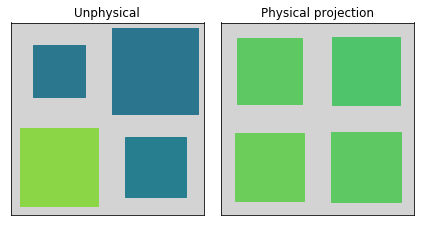

In [80]:
from forest.benchmarking.operator_tools.project_state_matrix import project_state_matrix_to_physical

rho_phys = project_state_matrix_to_physical(rho_unphys)

fig, (ax1, ax2) = plt.subplots(1, 2)
hinton(rho_unphys, ax=ax1)
hinton(rho_phys, ax=ax2)
ax1.set_title('Unphysical')
ax2.set_title('Physical projection')
fig.tight_layout()

In [ ]:
# Test the wizard method. Example from fig 1 of maximum likelihood minimum effort 
# https://doi.org/10.1103/PhysRevLett.108.070502

eigs = np.diag(np.array(list(reversed([3.0/5, 1.0/2, 7.0/20, 1.0/10, -11.0/20]))))
phys = project_state_matrix_to_physical(eigs)
np.allclose(phys, np.diag([0, 0, 1.0/5, 7.0/20, 9.0/20]))

# Lightweight Bootstrap for functionals of the state

In [91]:
import forest.benchmarking.distance_measures as dm
from forest.benchmarking.tomography import estimate_variance

In [92]:
from functools import partial
fast_tomo_est = partial(iterative_mle_state_estimate, epsilon=.0001, beta=.5, tol=1e-3)

**Purity**

In [93]:
mle_est = estimate_variance(results, qubits, fast_tomo_est, dm.purity,
                            n_resamples=40, project_to_physical=True)
lin_inv_est = estimate_variance(results, qubits, linear_inv_state_estimate, dm.purity,
                                n_resamples=40, project_to_physical=True)
print(mle_est)
print(lin_inv_est)

(0.976366671390057, 8.096610769504756e-06)
(0.9551345210316053, 0.00013453288014556413)


**Fidelity**

In [95]:
mle_est = estimate_variance(results, qubits, fast_tomo_est, dm.fidelity,
                            target_state=rho_true, n_resamples=40, project_to_physical=True)
lin_inv_est = estimate_variance(results, qubits, linear_inv_state_estimate, dm.fidelity,
                                target_state=rho_true, n_resamples=40, project_to_physical=True)
print(mle_est)
print(lin_inv_est)

Failed to find a square root.
Failed to find a square root.


ValueError: array must not contain infs or NaNs

## Advanced topics